## cleaning and the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Problem Statemnet:
    predict the purchase amount of the customer 

In [2]:
df_train=pd.read_csv("train.csv") ## it is the e-commerce data, using which we have to build model/s
df_train.shape

(550068, 12)

In [3]:
df_train.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [4]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

## import test data

In [5]:
df_test=pd.read_csv("test.csv")
df_test.shape


(233599, 11)

## merging the datas

In [6]:
df=df_train.append(df_test)## appends the df_test at axis 0 (row wise) with df_train

In [7]:
pd.concat([df_train,df_test],axis=0) ## above process can also be done by this  method too

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## features that can be deleted / dropped

user_ID -->as it unique id

In [11]:
df.drop(['User_ID'],axis=1,inplace=True)

In [12]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


## data preprocessing

Gender is categorical variable

In [13]:
df['Gender']=df['Gender'].map({'F':0,'M':1})  ## or df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [14]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


age is categorical variable

In [15]:
age_uniques=list(df['Age'].unique())

In [16]:
map_dict={r:i+1 for i,r in enumerate(age_uniques)}
map_dict

{'0-17': 1,
 '55+': 2,
 '26-35': 3,
 '46-50': 4,
 '51-55': 5,
 '36-45': 6,
 '18-25': 7}

In [17]:
df['Age']=df['Age'].map({'0-17': 1,
 '55+': 7,
 '26-35': 3,
 '46-50': 5,
 '51-55': 6,
 '36-45': 4,
 '18-25': 2})

In [18]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0


label encoding can be done

In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
temp=label_encoder.fit_transform(df['Age'])
temp
## replace temp with Age column if needed

array([0, 0, 0, ..., 2, 4, 4])

## city category

In [20]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [21]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head(2)

,B,C
0,0,0
1,0,0


In [22]:
df=pd.concat([df,df_city],axis=1)
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [23]:
df.drop(['City_Category'],axis=1,inplace=True)
df.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


## handling the missing values

In [24]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
df['Product_Category_2'].unique()   ## this a discrete feature 

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [26]:
df['Product_Category_2'].value_counts()  ## to handle the missing value in discrete feature its MODE

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [27]:
df['Product_Category_2'].mode()[0]


8.0

In [28]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df['Product_Category_2'].isnull().sum()

0

In [30]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [31]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [32]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [33]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [34]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [35]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

/tmp/ipykernel_18142/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


coverting object to integers/float

In [37]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


# data visualiztaion

In [38]:
## pairplot 

In [ ]:
sns.pairplot(df)

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

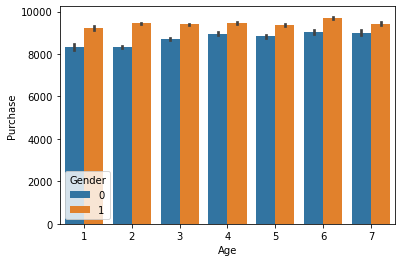

In [45]:
## age vs Purchase grouped via gender
sns.barplot('Age','Purchase',hue='Gender',data=df)

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

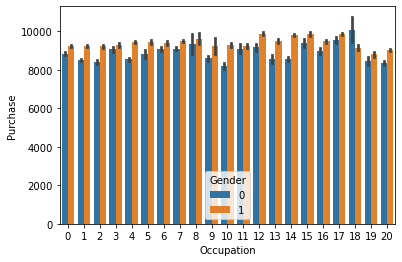

In [46]:
## purchage vs occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

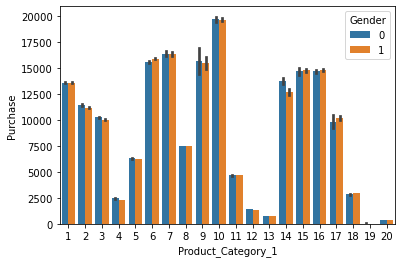

In [47]:
## purchage vs product 1
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

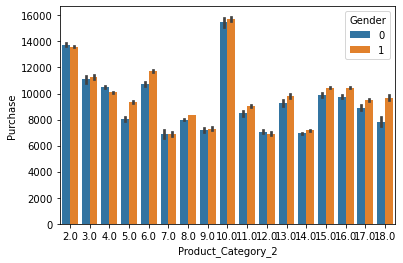

In [48]:
## purchage vs product 2
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

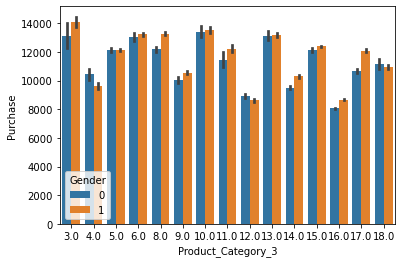

In [49]:
## purchage vs product 3
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

feature scaling

In [50]:
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [51]:
df_train

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [52]:
Y=df_train['Purchase']
Y.shape

(550068,)

In [53]:
X=df_train.drop(['Purchase','Product_ID'],axis=1)
X.shape

(550068, 10)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [56]:
from sklearn.ensemble import RandomForestRegressor  
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, 
 max_features=0.5, n_jobs=-1, oob_score=True)

In [57]:
m.fit(X_train, y_train)  

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1, oob_score=True)

In [58]:
m.estimators_

[DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=1272045211),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=1905804696),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=1184593897),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=1100167726),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=555808637),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=792064652),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=189233377),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=18254047),
 DecisionTreeRegressor(max_features=0.5, min_samples_leaf=3,
                       random_state=2069885828),
 DecisionTreeRe

In [59]:
y_pred= m.predict(X_test)  

y_pred

array([12969.11654048, 13829.76659164,  7231.16382179, ...,
       11608.86630562, 13344.65432377, 15644.17446196])

## predicting the unceratinity 

In [60]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])

In [61]:
std_=[np.std(preds[:,0]) for i in range(len(X_test))]

## predicting the intervals

In [62]:
pred_Q=pd.DataFrame(preds)

In [63]:
quantiles = [0.2, 0.5, 0.8]
actual_pred = pd.DataFrame()
for q in quantiles:
    print('quantile',q)
    s = pred_Q.quantile(q=q, axis=1)
    actual_pred = pd.concat([actual_pred,s],axis=1,sort=False)
actual_pred = actual_pred.round(2)

quantile 0.2
quantile 0.5
quantile 0.8


In [64]:
uncertainty_lower = actual_pred[0.2]
uncertainty_higher = actual_pred[0.8]

In [65]:
new_df=pd.DataFrame(zip(y_test,y_pred,std_,uncertainty_lower,uncertainty_higher),columns=['y_test','y_pred','std_','uncertainty_lower','uncertainty_higher'])

In [66]:
new_df.head()

,y_test,y_pred,std_,uncertainty_lower,uncertainty_higher
0,19142.0,12969.116540,3174.27269,5955.77,13783.78
1,15513.0,13829.766592,3174.27269,5943.09,13736.73
2,7802.0,7231.163822,3174.27269,5938.80,13748.29
3,15455.0,13795.520669,3174.27269,5935.00,13798.86
4,4492.0,15196.858705,3174.27269,5942.00,13801.09


<AxesSubplot:xlabel='inx'>

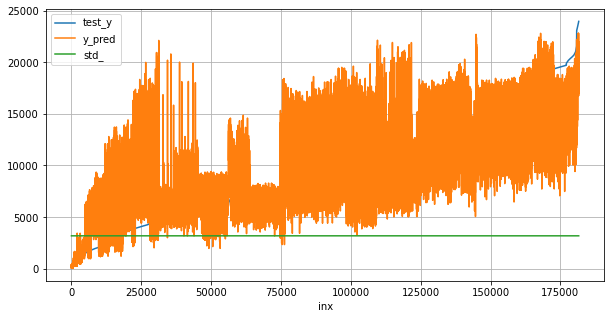

In [67]:
temp_df=pd.DataFrame(zip(y_test,y_pred,std_),columns=['test_y','y_pred','std_'])
temp_df=temp_df.sort_values('test_y')
inx=[k for k in range(1,len(y_test)+1)]
temp_df['inx']=inx
temp_df.plot(x='inx', y=['test_y','y_pred','std_'], figsize=(10,5), grid=True)

## metrices for model evaluation

In [68]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)
errors

8586064.560411986

In [69]:
# example of calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)
errors

2160.297419709497

In [70]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2930.1987237066337


In [71]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 7.982825523501844


In [72]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.6593181416050555


In [73]:
n=X_test.shape[1] # number of features/ independent features
k=1  # number of dependent features
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)


0.6167329093056875


## hyperparameter tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 90, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [76]:
random_grid

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 18, 26, 34, 42, 50, 58, 66, 74, 82, 90, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [77]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=42, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=42, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=42, bootstrap=True 
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=74, bootstrap=False 
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=74, bootstrap=False 
[CV] n_estimators=266, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=74, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=42, bootstrap=True, total=  47.5s
[CV] n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_

/home/boltzmann/space/anaconda3/envs/babs/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=66, bootstrap=False 
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=66, bootstrap=False 
[CV] n_estimators=333, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=66, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 3.3min
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 3.3min
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV] n_estimators=233, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=266, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 3.3min
[CV] n_estimators=233, min_samples_spl

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 14.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 18, 26, 34, 42, 50,
                                                      58, 66, 74, 82, 90,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 233, 266, 300,
                                                         333, 366, 400, 433,
                                                         466, 500]},
                   random_state=42, verbose=2)

In [78]:
rf_random.best_params_

{'n_estimators': 366,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 82,
 'bootstrap': True}

In [79]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_accuracy = evaluate(m, X_train, y_train)

Model Performance
Average Error: 1894.0534 degrees.
Accuracy = 70.68%.


In [80]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 1895.4086 degrees.
Accuracy = 70.96%.


In [81]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.40%.


In [86]:
# Get numerical feature importances
importances = list(m.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Product_Category_1   Importance: 0.76
Variable: Product_Category_2   Importance: 0.08
Variable: Occupation           Importance: 0.05
Variable: Product_Category_3   Importance: 0.04
Variable: Stay_In_Current_City_Years Importance: 0.03
Variable: Age                  Importance: 0.02
Variable: Gender               Importance: 0.01
Variable: Marital_Status       Importance: 0.01
Variable: B                    Importance: 0.01
Variable: C                    Importance: 0.0


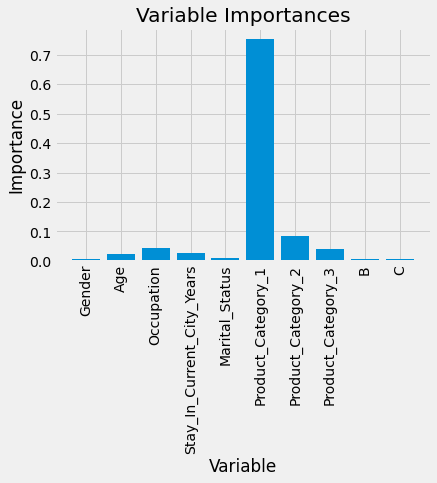

In [87]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list(X.columns), rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');